# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [240]:
import itertools
import networkx as nx
import numpy.random as rnd
import matplotlib.pyplot as plt
import math
from queue import PriorityQueue
import copy


### Класс для графа

In [241]:
class Graph:

    def __init__(self, graph_dict=dict()) -> None:
        self._graph_dict = graph_dict
        self.Visual = nx.Graph()
        self.mtx = None

    def add_vertex(self, vertex):
        if vertex not in self._graph_dict:
            self._graph_dict[vertex] = set()
            self.Visual.add_node(vertex)

    def remove_edge(self, edge: tuple):#только для Йена
        vertex1, vertex2 = tuple(edge)
        for x, y in [(vertex1, vertex2), (vertex2, vertex1)]:
            if x in self._graph_dict:
                for connection in self._graph_dict[x]:
                    _vertex, _weight = connection
                    if _vertex == y:
                        self._graph_dict[x].remove(connection)
                        break

    def add_edge(self, edge: tuple()):
        vertex1, vertex2, weight = tuple(edge)
        for x, y in [(vertex1, vertex2), (vertex2, vertex1)]:
            if x in self._graph_dict:
                self._graph_dict[x].add((y, weight))
            else:
                self._graph_dict[x] = {(y, weight)}
        self.Visual.add_edge(vertex1, vertex2)
        self.Visual[vertex1][vertex2]['weight']=weight

    def remove_vertex(self, vertex: str):#Только для Йена
        self._graph_dict.pop(vertex, None)

        for key, val in self._graph_dict.items():
            for connection in val:
                _vertex, _weight = connection

                if vertex == _vertex:
                    self._graph_dict[key].remove(connection)
                    break

    def neighbors(self, vertex):
        return self._graph_dict[vertex]
    
    def Visualize(self):
        nx.draw_circular(self.Visual,
         node_color='red',
         node_size=1000,
         with_labels=True)
    
    def SaveMTX(self, mtx):
        self.mtx = mtx

    def ShowMTX(self):
        for i in range(len(self.mtx)):
            print(self.mtx[i])
    
    def GetMTX(self):
        return self.mtx
    
    def GetNumberOfVertex(self):
        return len(self.mtx)

### Создание графа

In [242]:
graph = Graph()

# graph.add_vertex("a")  # 0
# graph.add_vertex("b")  # 1
# graph.add_vertex("c")  # 2
# graph.add_vertex("d")  # 3
# graph.add_vertex("e")  # 4
# graph.add_vertex("f")  # 5
# graph.add_vertex("g")  # 6
# graph.add_vertex("h")  # 7
# graph.add_vertex("j")  # 8

# graph.add_edge(("a", "b", 2))
# graph.add_edge(("a", "c", 6))
# graph.add_edge(("a", "d", 8))
# graph.add_edge(("a", "g", 3))

# graph.add_edge(("b", "c", 9))
# graph.add_edge(("b", "d", 3))
# graph.add_edge(("b", "f", 4))
# graph.add_edge(("b", "g", 9))

# graph.add_edge(("c", "d", 7))

# graph.add_edge(("d", "e", 5))
# graph.add_edge(("d", "f", 5))

# graph.add_edge(("e", "g", 8))
# graph.add_edge(("e", "h", 9))

# graph.add_edge(("f", "h", 6))
# graph.add_edge(("f", "j", 4))
# graph.add_edge(("j", "h", 1))

[0, 2, 6, 8, inf, inf, 3, inf, inf]
[2, 0, 9, 3, inf, 4, 9, inf, inf]
[6, 9, 0, 7, inf, inf, inf, inf, inf]
[8, 3, 7, 0, 5, 5, inf, inf, inf]
[inf, inf, inf, 5, 0, inf, 8, 9, inf]
[inf, 4, inf, 5, inf, 0, inf, 6, 4]
[3, 9, inf, inf, 8, inf, 0, inf, inf]
[inf, inf, inf, inf, 9, 6, inf, 0, 1]
[inf, inf, inf, inf, inf, 4, inf, 1, 0]


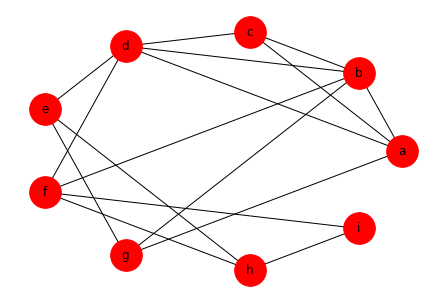

In [243]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
def MtxToGraph(mtx, graph:Graph):
    for i in range (len(mtx)):
        graph.add_vertex(alphabet[i])
    for i in range(len(mtx)):
        for j in range(len(mtx)):
            if i == j:
                continue
            elif mtx[i][j] == math.inf:
                continue
            else:
                graph.add_edge((alphabet[i],alphabet[j], mtx[i][j]))

    graph.SaveMTX(mtx)
Q = math.inf
            #a  b  c  d  e  f  g  h  i (1,2,3,4,5,6,7,8,9)
testMTX = [ [0, 2, 6, 8, Q, Q, 3, Q, Q],#a
            [2, 0, 9, 3, Q, 4, 9, Q, Q],#b
            [6, 9, 0, 7, Q, Q, Q, Q, Q],#c
            [8, 3, 7, 0, 5, 5, Q, Q, Q],#d
            [Q, Q, Q, 5, 0, Q, 8, 9, Q],#e
            [Q, 4, Q, 5, Q, 0, Q, 6, 4],#f
            [3, 9, Q, Q, 8, Q, 0, Q, Q],#g
            [Q, Q, Q, Q, 9, 6, Q, 0, 1],#h
            [Q, Q, Q, Q, Q, 4, Q, 1, 0],#i                                                  
                                        ]
MtxToGraph(testMTX, graph)
graph.ShowMTX()
graph.Visualize()

### Флойд-Уоршилл

In [244]:
def get_Floyd_path( vertexNumberList, start, end):
    global alphabet
    path = [alphabet[end]]
    while end != start:
        letter = alphabet[vertexNumberList[end][start]]
        end = vertexNumberList[end][start]
        path.insert(0,letter)
    return path

def Floyd(graph:graph, start, end):
    global alphabet
    numberOfVertex = graph.GetNumberOfVertex()
    MtxOfGraph = graph.GetMTX().copy()
    vertexNumberList = [[v for v in range(numberOfVertex)] for u in range(numberOfVertex)]
    for k in range(numberOfVertex):
        for i in range(numberOfVertex):
            for j in range(numberOfVertex):
                temp = MtxOfGraph[i][k] + MtxOfGraph[k][j]
                if MtxOfGraph[i][j]>temp:
                    MtxOfGraph[i][j] = temp
                    vertexNumberList[i][j] = k
    print(get_Floyd_path( vertexNumberList, start, end))

Floyd(graph, 0, 7)

['a', 'b', 'f', 'i', 'h']


### Дейкстра

In [245]:

def dijkstra(current_graph: Graph, start_position: str, final_position: str):
    variants = PriorityQueue()
    variants.put(start_position, 0)
    came_from = {}
    current_cost = {}
    came_from[start_position] = None
    current_cost[start_position] = 0
    current = None

    while not variants.empty():
        current = variants.get()

        for next in current_graph.neighbors(current[0]):
            new_cost = current_cost[current[0]] + next[1]
            if next[0] not in current_cost or new_cost < current_cost[next[0]]:
                current_cost[next[0]] = new_cost

                priority = new_cost
                variants.put(next[0], priority)
                came_from[next[0]] = current[0]

    if final_position in came_from.keys():
        return get_dijstra_path(came_from, start_position, final_position), current_cost[final_position]

    return None


def get_dijstra_path(paths: list(), start, final):
    current = final
    result = list()
    while True:
        result.append(current)
        if current == start:
            return result[::-1]

        current = paths[current]




### Беллмана-Форда

### Джонсона

### Левита

### Йена

In [246]:
# ## Ин прогресс

# print(dijkstra(graph, "a", "h"))
# roots = {}
# lenghts = {}
roots, lenghts = dijkstra(graph, 'a', 'h')
# print(dijkstra(graph, roots[0][0], roots[0][1]))

def get_path_Yen(roots):
    path = ''
    for i in range(len(roots)):
        path = path + roots[i]
    return path
print(roots)
print(get_path_Yen(roots))

def get_roots_Yen(path):
    root = []
    for i in range (len(path)):
        root.append(path[i])
    return root
print(get_roots_Yen(get_path_Yen(roots)))


['a', 'b', 'f', 'i', 'h']
abfih
['a', 'b', 'f', 'i', 'h']


In [248]:
Yen_Paths = []
Yen_Lenghts = []
print(dijkstra(graph, 'a','h'))
mtxforYen = graph.GetMTX()
YensGraph = copy.deepcopy(graph)
temp_lenghts = dict()
# MtxToGraph(mtxforYen, YensGraph)
# print(dijkstra(YensGraph, 'a', 'h'))
def Yen(step, gr: Graph, start, finish, roots):
    global Yen_Paths, Yen_Lenghts, temp_lenghts
    # print(roots)
    for steps in range(step+1):
        if steps==0:
            smthWrong, b = dijkstra(gr, roots[0], roots[1])
            temp_path = get_path_Yen(smthWrong)
            mydict = dict({temp_path:b})
            temp_lenghts.update(mydict)
            print(temp_lenghts)
            gr.remove_edge((roots[0], roots[1]))
            a, b = dijkstra(gr, start, finish)
            # print(a)
            a = get_path_Yen(a)
            Yen_Paths.append(a)
            Yen_Lenghts.append(b)
            # step+=1
            # Yen(step, gr, roots[1], finish, roots)
            
        elif start==finish:
            return
        else:
            try:
                temp_path = ''
                for i in range(steps):
                    temp_path+=roots[i]
                smthWrong, b = dijkstra(gr, roots[steps], roots[steps+1])
                b = temp_lenghts[steps-1]+b
                temp_lenghts.append(b)
                gr.remove_vertex(roots[steps-1])
                gr.remove_edge((roots[steps], roots[steps+1]))
                a, b = dijkstra(gr, roots[steps], finish)

                temp_path = temp_path + get_path_Yen(a)
                
                print(temp_lenghts)
                print(len(temp_lenghts))


                b+=temp_lenghts[steps]
                Yen_Paths.append(temp_path)
                Yen_Lenghts.append(b)
                print(temp_path)
            except TypeError:
                print(f'{step-1} is enough for this start and finish')
            # Yen(0, graph, start, finish)

Yen(0, YensGraph, 'a', 'h', get_path_Yen(roots))
print(Yen_Paths, '\t', Yen_Lenghts)


(['a', 'b', 'f', 'i', 'h'], 11)
{'ab': 2}
['adfih'] 	 [18]


In [ ]:

# show_roots(roots, lenghts)
# # print(roots[0])

# def yen_algos(roots:list, step:int, graph: Graph, start, finish):
#     CopyOfGraph = Graph()
#     CopyOfGraph = graph
#     arrayOfLenght = []
#     arrayOfLetters = []
#     candi, lenOfCandi = [], []
#     prev_vertex = None
#     str = []
#     for i in range(step+1):
#         current_vertex = roots[0][i]
#         if current_vertex == finish:
#             print(f'{i-1} steps is good for that graphs')
#             break
#         next_vertex = roots[0][i+1]
#         a, b = dijkstra(CopyOfGraph, current_vertex, next_vertex)
#         arrayOfLenght.append(b)
#         if len(arrayOfLenght)>1:
#             arrayOfLenght[-1] += arrayOfLenght[-2]
#         arrayOfLetters.append(a)
#         if i == 0:
#             CopyOfGraph.remove_edge((current_vertex, next_vertex))
#             a, b = dijkstra(CopyOfGraph, current_vertex, finish)
#             candi.append(a)
#             lenOfCandi.append(b)
#             print()
#             print(arrayOfLenght)
#             print()
#             prev_vertex = current_vertex
#             # CopyOfGraph.remove_vertex()
#         elif step == len(roots[0]):
#             print("hehe, boi")
#             break
#         else:
#             CopyOfGraph.remove_vertex(prev_vertex)
#             CopyOfGraph.remove_edge((current_vertex, next_vertex))
#             a, b, = dijkstra(CopyOfGraph, current_vertex, finish)
#             b = b + arrayOfLenght[-1]
#             print('b')
#             print(b)
#             print('array')
#             print(arrayOfLenght)
#             print()
#             a.insert(0, str)
#             str.append(prev_vertex)
#             candi.append(a)
#             lenOfCandi.append(b)
#             prev_vertex = current_vertex
#     return candi, lenOfCandi

# canditates = []
# lenOfCandi = []
# canditates, lenOfCandi = yen_algos(roots, 2 , graph, 'a', 'h')
# print(canditates)
# print(lenOfCandi)


# # print(dijkstra(graph, roots[0][0], roots[0][1]))
# # print(canditates, candi_len)
